<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [103]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import re

--2025-06-29 19:46:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.5MB/s    in 2.7s    

2025-06-29 19:46:25 (55.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [104]:
# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



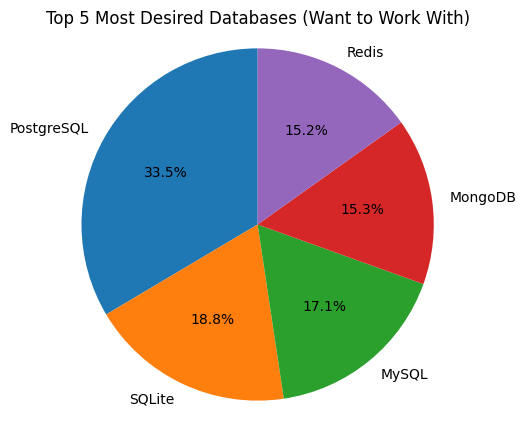

In [107]:
df_new = df.copy()
# Convert to string, then split by comma, then by semicolon
df_new['DatabaseWantToWorkWith'] = df_new['DatabaseWantToWorkWith'].astype(str).str.split(',')
df_new['DatabaseWantToWorkWith'] = df_new['DatabaseWantToWorkWith'].astype(str).str.split(';')

# Clean the data using regex
df_new['DatabaseWantToWorkWith'] = df_new['DatabaseWantToWorkWith'].apply(
    lambda x: [re.sub(r"['\[\]]", " ", str(item)).strip() for item in x]
)

# Explode the lists into separate rows and count values, excluding "nan"
database_counts = df_new.explode('DatabaseWantToWorkWith')['DatabaseWantToWorkWith']
database_counts = database_counts[database_counts != 'nan'].value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Most Desired Databases (Want to Work With)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



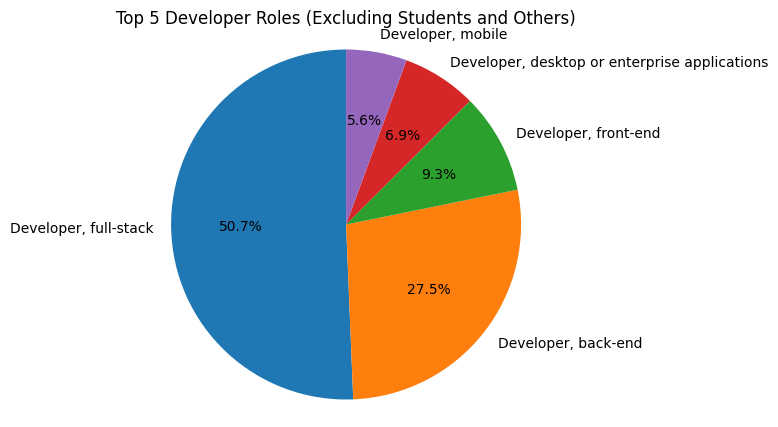

In [100]:
devtype_counts = df['DevType'].value_counts()
devtype_counts = devtype_counts[~devtype_counts.index.isin(['Student', 'Other (please specify):'])].head(5)

# Create and display the pie chart
plt.figure(figsize=(6, 5))
plt.pie(devtype_counts, labels=devtype_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Developer Roles (Excluding Students and Others)')
plt.axis('equal')
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



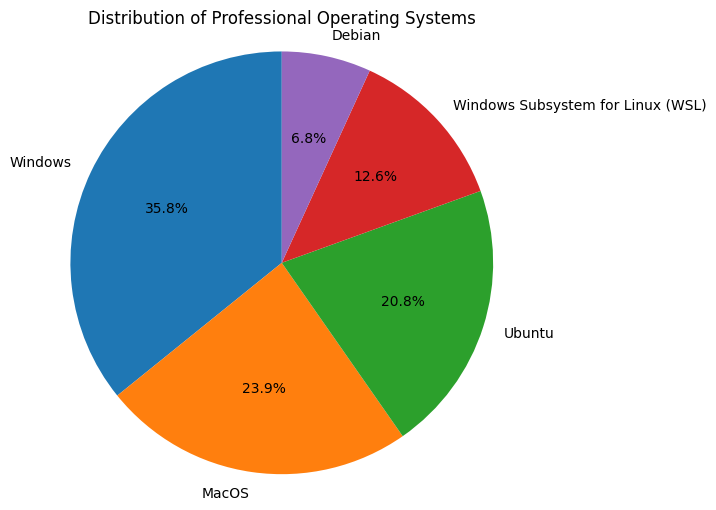

In [98]:
df_new = df.copy()
# Convert to string, then split by comma, then by semicolon
df_new['OpSysProfessional use'] = df_new['OpSysProfessional use'].astype(str).str.split(',')
df_new['OpSysProfessional use'] = df_new['OpSysProfessional use'].astype(str).str.split(';')

# Clean the data using regex
df_new['OpSysProfessional use'] = df_new['OpSysProfessional use'].apply(
    lambda x: [re.sub(r"['\[\]]", " ", str(item)).strip() for item in x]
)

# Explode the lists so each OS is on its own row
df_exploded = df_new.explode('OpSysProfessional use')

# Get the value counts of operating systems used professionally, excluding 'nan'
opsys_counts = df_exploded['OpSysProfessional use'].value_counts()
opsys_counts = opsys_counts[opsys_counts.index != 'nan'].head(5)


# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(opsys_counts, labels=opsys_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Professional Operating Systems')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



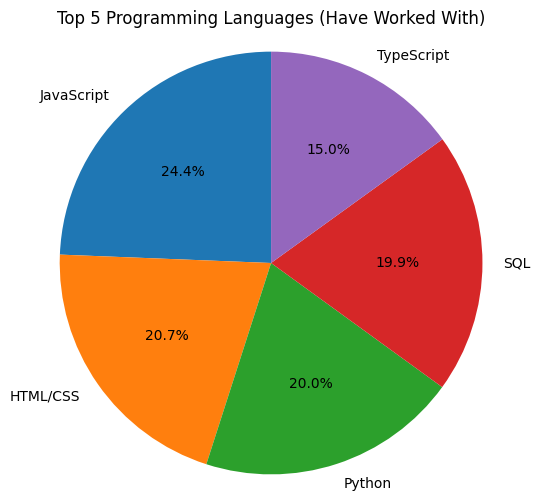

In [109]:
df_new = df.copy()
# Convert to string, then split by comma, then by semicolon
df_new['LanguageHaveWorkedWith'] = df_new['LanguageHaveWorkedWith'].astype(str).str.split(',')
df_new['LanguageHaveWorkedWith'] = df_new['LanguageHaveWorkedWith'].astype(str).str.split(';')

# Clean the data using regex
df_new['LanguageHaveWorkedWith'] = df_new['LanguageHaveWorkedWith'].apply(
    lambda x: [re.sub(r"['\[\]]", " ", str(item)).strip() for item in x]
)
# Explode the 'LanguageHaveWorkedWith' column and count the occurrences of each language
language_counts = df_new.explode('LanguageHaveWorkedWith')['LanguageHaveWorkedWith'].value_counts()

# Get the top 5 languages
top_5_languages = language_counts.head(5)

# Create a pie chart for the top 5 languages
plt.figure(figsize=(6, 6))
plt.pie(top_5_languages, labels=top_5_languages.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Programming Languages (Have Worked With)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



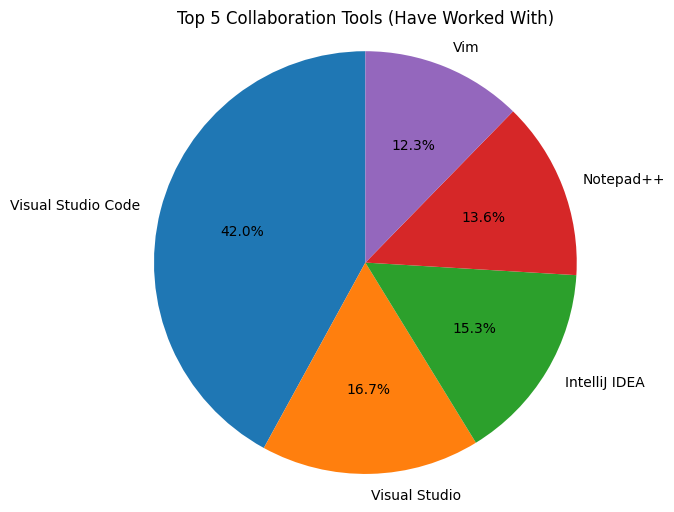

In [110]:
df_new = df.copy()
# Convert to string, then split by comma, then by semicolon
df_new['NEWCollabToolsHaveWorkedWith'] = df_new['NEWCollabToolsHaveWorkedWith'].astype(str).str.split(',')
df_new['NEWCollabToolsHaveWorkedWith'] = df_new['NEWCollabToolsHaveWorkedWith'].astype(str).str.split(';')

# Clean the data using regex
df_new['NEWCollabToolsHaveWorkedWith'] = df_new['NEWCollabToolsHaveWorkedWith'].apply(
    lambda x: [re.sub(r"['\[\]]", " ", str(item)).strip() for item in x]
)
# Explode the 'NEWCollabToolsHaveWorkedWith' column and count the occurrences of each tool
collab_tools_counts = df_new.explode('NEWCollabToolsHaveWorkedWith')['NEWCollabToolsHaveWorkedWith'].value_counts()

# Get the top collaboration tools (let's say top 5 for consistency with previous charts)
top_collab_tools = collab_tools_counts.head(5)

# Create a pie chart for the top collaboration tools
plt.figure(figsize=(6, 6))
plt.pie(top_collab_tools, labels=top_collab_tools.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Collaboration Tools (Have Worked With)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



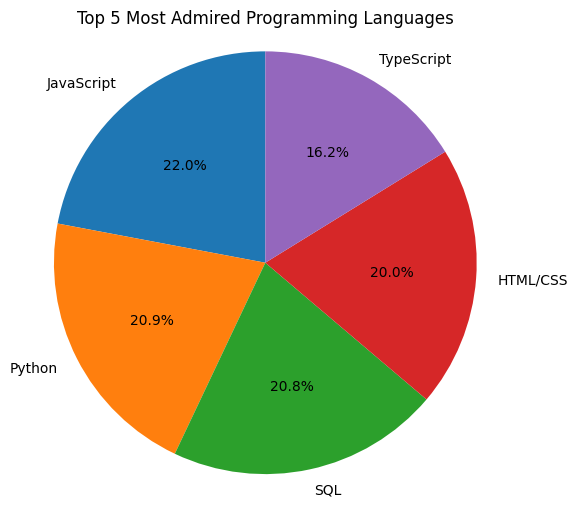

In [111]:
df_new = df.copy()
# Convert to string, then split by comma, then by semicolon
df_new['LanguageAdmired'] = df_new['LanguageAdmired'].astype(str).str.split(',')
df_new['LanguageAdmired'] = df_new['LanguageAdmired'].astype(str).str.split(';')

# Clean the data using regex
df_new['LanguageAdmired'] = df_new['LanguageAdmired'].apply(
    lambda x: [re.sub(r"['\[\]]", " ", str(item)).strip() for item in x]
)
# Explode the 'LanguageAdmired' column and count the occurrences of each language
admired_language_counts = df_new.explode('LanguageAdmired')['LanguageAdmired'].value_counts()

# Get the top 5 most admired languages
top_admired_languages = admired_language_counts.head(5)

# Create a pie chart for the top 5 most admired languages
plt.figure(figsize=(6, 6))
plt.pie(top_admired_languages, labels=top_admired_languages.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Most Admired Programming Languages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



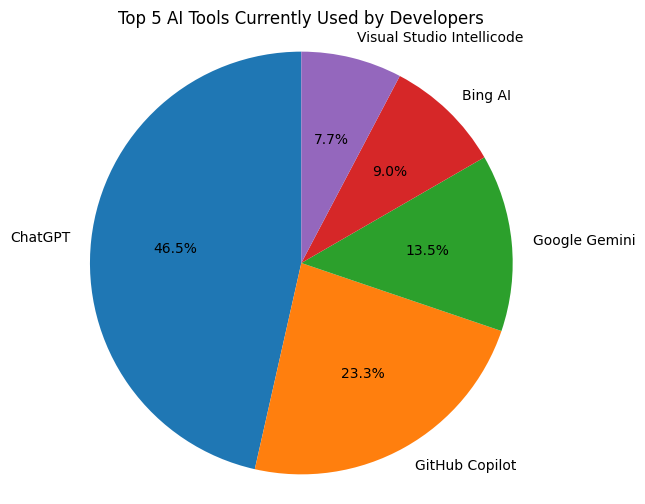

In [120]:
df_new = df.copy()
# Convert to string, then split by comma, then by semicolon
df_new['AISearchDevHaveWorkedWith'] = df_new['AISearchDevHaveWorkedWith'].astype(str).str.split(',')
df_new['AISearchDevHaveWorkedWith'] = df_new['AISearchDevHaveWorkedWith'].astype(str).str.split(';')

# Clean the data using regex
df_new['AISearchDevHaveWorkedWith'] = df_new['AISearchDevHaveWorkedWith'].apply(
    lambda x: [re.sub(r"['\[\]]", " ", str(item)).strip() for item in x]
)
# Explode the 'AISearchDevHaveWorkedWith' column and count the occurrences of each tool
aitool_counts = df_new.explode('AISearchDevHaveWorkedWith')['AISearchDevHaveWorkedWith'].value_counts()

# Exclude 'nan' values and get the top 5 AI tools
top_aitools = aitool_counts[aitool_counts.index != 'nan'].head(5)

# Create a pie chart for the top 5 AI tools
plt.figure(figsize=(6, 6))
plt.pie(top_aitools, labels=top_aitools.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 AI Tools Currently Used by Developers')
plt.axis('equal')
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



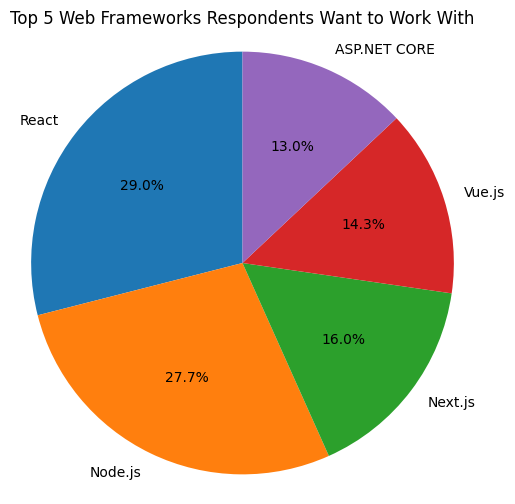

In [123]:
df_new = df.copy()
# Convert to string, then split by comma, then by semicolon
df_new['WebframeWantToWorkWith'] = df_new['WebframeWantToWorkWith'].astype(str).str.split(',')
df_new['WebframeWantToWorkWith'] = df_new['WebframeWantToWorkWith'].astype(str).str.split(';')

# Clean the data using regex
df_new['WebframeWantToWorkWith'] = df_new['WebframeWantToWorkWith'].apply(
    lambda x: [re.sub(r"['\[\]]", " ", str(item)).strip() for item in x]
)
# Explode the 'WebframeWantToWorkWith' column and count the occurrences of each framework
webframe_counts = df_new.explode('WebframeWantToWorkWith')['WebframeWantToWorkWith'].value_counts()
webframe_counts = webframe_counts[~webframe_counts.index.isin(['NA', 'nan'])]

# Exclude 'nan' values and get the top 5 web frameworks
top_webframes = webframe_counts.head(5)

# Create a pie chart for the top 5 web frameworks
plt.figure(figsize=(6, 6))
plt.pie(top_webframes, labels=top_webframes.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Web Frameworks Respondents Want to Work With')
plt.axis('equal')
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



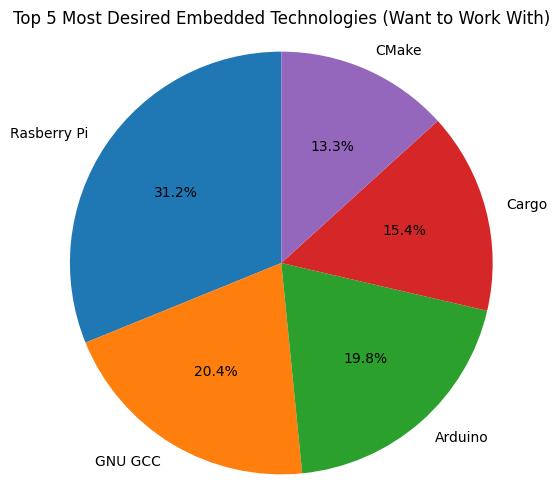

In [124]:
df_new = df.copy()
# Convert to string, then split by comma, then by semicolon
df_new['EmbeddedWantToWorkWith'] = df_new['EmbeddedWantToWorkWith'].astype(str).str.split(',')
df_new['EmbeddedWantToWorkWith'] = df_new['EmbeddedWantToWorkWith'].astype(str).str.split(';')

# Clean the data using regex
df_new['EmbeddedWantToWorkWith'] = df_new['EmbeddedWantToWorkWith'].apply(
    lambda x: [re.sub(r"['\[\]]", " ", str(item)).strip() for item in x]
)

# Explode the 'EmbeddedWantToWorkWith' column and count the occurrences of each technology
embedded_counts = df_new.explode('EmbeddedWantToWorkWith')['EmbeddedWantToWorkWith'].value_counts()

# Exclude 'nan' values and get the top 5 embedded technologies
top_embedded = embedded_counts[embedded_counts.index != 'nan'].head(5)

# Create a pie chart for the top 5 most desired embedded technologies
plt.figure(figsize=(6, 6))
plt.pie(top_embedded, labels=top_embedded.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Most Desired Embedded Technologies (Want to Work With)')
plt.axis('equal')
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
